In [1]:
import numpy as np
import pandas as pd

### Q-1: You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
#### Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi' 'mumbai') as level-0 Index
#### And Sort on row index level-0


In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)
df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [13]:
df.transpose().stack().swaplevel().unstack().sort_index(level=0,ascending=[False])  

cse                  ece         
            avg_package students avg_package students
mumbai 2019           0        0           0        0
       2020           0        0           0        0
       2021           0        0           0        0
       2022           0        0           0        0
delhi  2019           1        2           9       10
       2020           3        4          11       12
       2021           5        6          13       14
       2022           7        8          15       16

### Q-2: Covid Cases Data Set Problem
### Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.


In [34]:
death = pd.read_csv(r"D:\Jupyter\Dataset_by_campusx\datasets-session-21-20241223T132106Z-001\datasets-session-21\time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv(r"D:\Jupyter\Dataset_by_campusx\datasets-session-21-20241223T132106Z-001\datasets-session-21\time_series_covid19_confirmed_global.csv")

In [35]:
death.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595


In [36]:
confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812


In [37]:
death.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/24/22', '12/25/22', '12/26/22', '12/27/22', '12/28/22', '12/29/22',
       '12/30/22', '12/31/22', '1/1/23', '1/2/23'],
      dtype='object', length=1081)

In [38]:
death = death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name="date",value_name = "No of Deaths")
confirmed = confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name="date",value_name = "No of cases")

In [39]:
print(death.shape)
death.head(1)

(311253, 6)


,Province/State,Country/Region,Lat,Long,date,No of Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0


In [40]:
print(confirmed.shape)
confirmed.head(2)

(311253, 6)


,Province/State,Country/Region,Lat,Long,date,No of cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [44]:
updated_df = death.merge(confirmed,on=['Province/State', 'Country/Region', 'Lat', 'Long',"date"])[['Province/State', 'Country/Region',"date","No of cases","No of Deaths"]]
updated_df.set_index(["Country/Region","Province/State"]).sort_index()

date  No of cases  No of Deaths
Country/Region Province/State                                     
Afghanistan    NaN              1/22/20            0             0
               NaN              1/23/20            0             0
               NaN              1/24/20            0             0
               NaN              1/25/20            0             0
               NaN              1/26/20            0             0
...                                 ...          ...           ...
Zimbabwe       NaN             12/29/22       259981          5637
               NaN             12/30/22       259981          5637
               NaN             12/31/22       259981          5637
               NaN               1/1/23       259981          5637
               NaN               1/2/23       259981          5637

[311253 rows x 3 columns]

### Q-3: Show Country with Heighest death percent out of confirmed Cases.

In [68]:
temp_df = updated_df.groupby("Country/Region",as_index=False)[["No of cases","No of Deaths"]].sum()
temp_df["%death"] = (temp_df["No of Deaths"]/temp_df["No of cases"])*100
temp_df.sort_values("%death",ascending=False).iloc[1][0]

'MS Zaandam'

In [89]:
from warnings import filterwarnings
filterwarnings("ignore")

### Q-4 : Make a dataframe for India from Covid Data with one extra column representing no of new cases.
- Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
- First day new cases will be NaN or equal to no of cases
- Say on 12/30/22 No of cases is - 44679608 and a day previous (12/29/22) no of cases is - 44679382.

- Then for 12/30/22 -> No of New Cases = 44679608 - 44679382 =

- Note:- Try using shift Function

In [90]:
india_df = updated_df.groupby("Country/Region").get_group("India")
india_df

,Province/State,Country/Region,date,No of cases,No of Deaths
148,NaN,India,1/22/20,0,0
437,NaN,India,1/23/20,0,0
726,NaN,India,1/24/20,0,0
1015,NaN,India,1/25/20,0,0
1304,NaN,India,1/26/20,0,0
...,...,...,...,...,...
309956,NaN,India,12/29/22,44679382,530699
310245,NaN,India,12/30/22,44679608,530702
310534,NaN,India,12/31/22,44679873,530705
310823,NaN,India,1/1/23,44680046,530707


In [91]:
india_df["temp_col"] =  india_df["No of cases"].shift(1)

In [92]:
india_df["new_cases"] = india_df["No of cases"] - india_df["temp_col"] 

In [94]:
india_df.drop(columns=["temp_col"],inplace=True)

In [95]:
india_df

,Province/State,Country/Region,date,No of cases,No of Deaths,new_cases
148,NaN,India,1/22/20,0,0,NaN
437,NaN,India,1/23/20,0,0,0.0
726,NaN,India,1/24/20,0,0,0.0
1015,NaN,India,1/25/20,0,0,0.0
1304,NaN,India,1/26/20,0,0,0.0
...,...,...,...,...,...,...
309956,NaN,India,12/29/22,44679382,530699,243.0
310245,NaN,India,12/30/22,44679608,530702,226.0
310534,NaN,India,12/31/22,44679873,530705,265.0
310823,NaN,India,1/1/23,44680046,530707,173.0


### Q-5: Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

In [103]:
df = pd.read_csv("https://tinyurl.com/2fe6vz4u")
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head(1)

,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,1,India,Kanpur,2016,173,>75%,319,NaN,2018


In [109]:
#Find out the name of the city of India which is most poluted based on PM10.
df0 = df.set_index(["Country","City/Town"])
work_df = df0.loc["India"].copy()
work_df[work_df["PM10"] ==  work_df["PM10"].max()].index[0]

'Kanpur'

In [110]:
#Find out the name of the city of India which has minumum pollution level based on PM10.
work_df[work_df["PM10"] ==  work_df["PM10"].min()].index[0]

'Aizawl'

In [112]:
#Do same operations (like 1 and 2) with the country China.
df0 = df.set_index(["Country","City/Town"])
work_df = df0.loc["China"].copy()
print(work_df[work_df["PM10"] ==  work_df["PM10"].max()].index[0])
print(work_df[work_df["PM10"] ==  work_df["PM10"].min()].index[0])

Jinan
Anshun


<AxesSubplot: ylabel='PM10'>

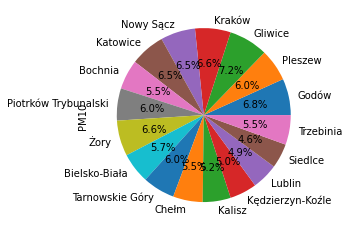

In [116]:
#Make a pie chart based on the column "PM10" of the country Poland.
work_df = df0.loc["Poland"].copy()
work_df["PM10"].plot(kind="pie",autopct="%0.1f%%")

<AxesSubplot: xlabel='Country,City/Town'>

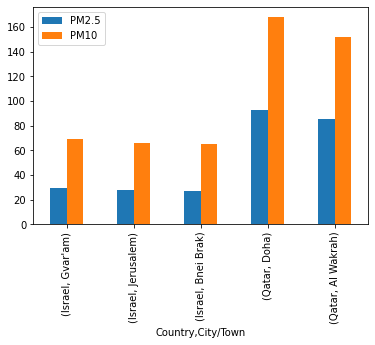

In [119]:
#Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
df0.loc[["Israel","Qatar"]][["PM2.5","PM10"]].plot(kind="bar")

In [121]:
#Convert this MultiIndex DataFrame to Series by retaining the informations.
df0.stack()

Country  City/Town                         
India    Kanpur     Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                    PM10                        319
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 2638, dtype: object